In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

import seaborn as sn

In [2]:
# read dataframe
path = 'fuel poverty 2.0.csv'
df = pd.read_csv(path)

In [3]:
# check some example numbers
df.head()

,Old Ward Code,New ward code,Ward,% Households without central heating - 2001,Cavity walls that are uninsulated (2010),Lofts with less than 150mm insulation (2010),Indices of Deprivation 2010 Health Deprivation and Disability domain,SMR - 2010,Incapacity Benefit rate - 2010,% aged 60 or over - 2010,Pension Credit rate - 2010,JSA claimant rate - 2010,Income Support rate - 2010,% of children in poverty - 2009,% of households fuel poor (2009)
0,00AA,E09000001,City of London,4.6,69.4,73.8,-1.43,73.8,2.6,16.8,12.6,1.2,1.6,17.5,6.5
1,00ABFX,E05000026,Abbey,9.9,68.6,72.9,0.27,65.7,4.8,10.8,29.6,4.9,6.2,40.3,16.2
2,00ABFY,E05000027,Alibon,7.9,64.9,73.5,0.56,83.8,8.6,17.0,35.7,6.5,10.8,38.8,18.9
3,00ABFZ,E05000028,Becontree,11.7,58.4,73.3,0.46,111.2,7.5,13.2,40.0,5.9,7.8,37.9,17.3
4,00ABGA,E05000029,Chadwell Heath,14.7,69.4,66.3,0.46,88.5,7.6,24.5,27.4,5.5,8.8,39.0,16.8


In [5]:
# print the shape of the DataFrame
df.shape

(679, 15)

In [6]:
# print the column names
df.columns

Index(['Old Ward Code', 'New ward code', 'Ward',
       '% Households without central heating - 2001',
       'Cavity walls that are uninsulated (2010)',
       'Lofts with less than 150mm insulation (2010)',
       'Indices of Deprivation 2010 Health Deprivation and Disability domain',
       'SMR - 2010', 'Incapacity Benefit rate - 2010',
       '% aged 60 or over - 2010', 'Pension Credit rate - 2010',
       'JSA claimant rate - 2010', 'Income Support rate - 2010',
       '% of children in poverty - 2009', '% of households fuel poor (2009)'],
      dtype='object')

In [7]:
# rename columns
df_rename = df.rename(columns = {'% Households without central heating - 2001':'Heating',
                                 'Cavity walls that are uninsulated (2010)':'Wall',
                                 'Lofts with less than 150mm insulation (2010)':'Insulation',
                                 'Indices of Deprivation 2010 Health Deprivation and Disability domain':'Deprivation',
                                 'SMR - 2010':'SMR',
                                 'Incapacity Benefit rate - 2010':'Benefit',
                                 '% aged 60 or over - 2010':'Age',
                                 'Pension Credit rate - 2010':'Pension',
                                 'JSA claimant rate - 2010':'JSA',
                                 'Income Support rate - 2010':'Income',
                                 '% of children in poverty - 2009':'Children',
                                 '% of households fuel poor (2009)':'HFP'})
df_rename.columns

Index(['Old Ward Code', 'New ward code', 'Ward', 'Heating', 'Wall',
       'Insulation', 'Deprivation', 'SMR', 'Benefit', 'Age', 'Pension', 'JSA',
       'Income', 'Children', 'HFP'],
      dtype='object')

In [8]:
# pick the columns that we need
df_pick = df_rename.loc[:,['Heating', 'Wall', 'Insulation',
                           'Deprivation', 'SMR', 'Benefit',
                           'Age', 'Pension',
                           'JSA',
                           'Income', 'Children', 'HFP']]
df_pick.columns

Index(['Heating', 'Wall', 'Insulation', 'Deprivation', 'SMR', 'Benefit', 'Age',
       'Pension', 'JSA', 'Income', 'Children', 'HFP'],
      dtype='object')

In [13]:
#Data standardisation

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

df_standardised = df_pick.copy()
for c in df_pick.columns.values:
    df_standardised[c] = mms.fit_transform(df_pick[c].values.reshape(-1,1))
df_standardised.head()

,Heating,Wall,Insulation,Deprivation,SMR,Benefit,Age,Pension,JSA,Income,Children,HFP
0,0.149533,0.753482,0.683230,0.303665,0.215043,0.143791,0.404762,0.135318,0.081081,0.082278,0.262522,0.053691
1,0.397196,0.742340,0.655280,0.748691,0.174154,0.287582,0.166667,0.365359,0.414414,0.373418,0.656304,0.704698
2,0.303738,0.690808,0.673913,0.824607,0.265522,0.535948,0.412698,0.447903,0.558559,0.664557,0.630397,0.885906
3,0.481308,0.600279,0.667702,0.798429,0.403836,0.464052,0.261905,0.506089,0.504505,0.474684,0.614853,0.778523
4,0.621495,0.753482,0.450311,0.798429,0.289248,0.470588,0.710317,0.335589,0.468468,0.537975,0.633851,0.744966


<AxesSubplot:xlabel='Children', ylabel='HFP'>

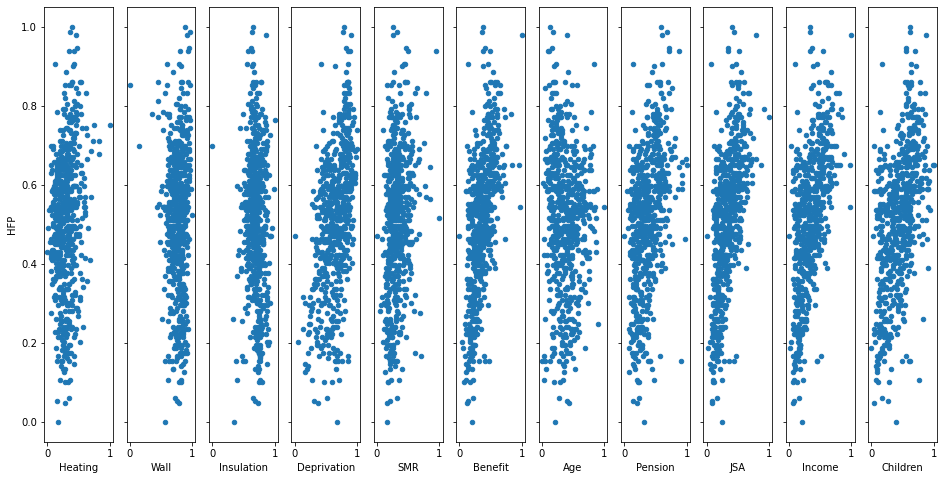

In [14]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 11, sharey=True)
df_standardised.plot(kind='scatter', x='Heating', y='HFP', ax=axs[0], figsize=(16, 8))
df_standardised.plot(kind='scatter', x='Wall', y='HFP', ax=axs[1])
df_standardised.plot(kind='scatter', x='Insulation', y='HFP', ax=axs[2])
df_standardised.plot(kind='scatter', x='Deprivation', y='HFP', ax=axs[3])
df_standardised.plot(kind='scatter', x='SMR', y='HFP', ax=axs[4])
df_standardised.plot(kind='scatter', x='Benefit', y='HFP', ax=axs[5])
df_standardised.plot(kind='scatter', x='Age', y='HFP', ax=axs[6])
df_standardised.plot(kind='scatter', x='Pension', y='HFP', ax=axs[7])
df_standardised.plot(kind='scatter', x='JSA', y='HFP', ax=axs[8])
df_standardised.plot(kind='scatter', x='Income', y='HFP', ax=axs[9])
df_standardised.plot(kind='scatter', x='Children', y='HFP', ax=axs[10])

In [15]:
df_standardised.corr()

,Heating,Wall,Insulation,Deprivation,SMR,Benefit,Age,Pension,JSA,Income,Children,HFP
Heating,1.000000,0.170786,0.389269,0.287208,0.074760,0.258062,-0.408032,0.291913,0.285139,0.278432,0.257267,0.184951
Wall,0.170786,1.000000,0.429029,-0.175603,-0.051637,-0.167233,-0.013047,-0.099873,-0.109349,-0.186220,-0.166662,-0.004488
Insulation,0.389269,0.429029,1.000000,0.012037,-0.062687,0.033232,-0.216899,0.081150,-0.043085,0.017965,0.039029,-0.070125
Deprivation,0.287208,-0.175603,0.012037,1.000000,0.397298,0.767408,-0.603663,0.804364,0.776067,0.770857,0.812780,0.491723
SMR,0.074760,-0.051637,-0.062687,0.397298,1.000000,0.343888,-0.346415,0.491008,0.383315,0.360537,0.325993,0.244125
Benefit,0.258062,-0.167233,0.033232,0.767408,0.343888,1.000000,-0.413905,0.763310,0.865611,0.962621,0.855228,0.576482
Age,-0.408032,-0.013047,-0.216899,-0.603663,-0.346415,-0.413905,1.000000,-0.764667,-0.516917,-0.471916,-0.605704,-0.065773
Pension,0.291913,-0.099873,0.081150,0.804364,0.491008,0.763310,-0.764667,1.000000,0.797426,0.770754,0.844020,0.436156
JSA,0.285139,-0.109349,-0.043085,0.776067,0.383315,0.865611,-0.516917,0.797426,1.000000,0.897436,0.832672,0.603741
Income,0.278432,-0.186220,0.017965,0.770857,0.360537,0.962621,-0.471916,0.770754,0.897436,1.000000,0.889243,0.568301


Text(0.5, 1.0, 'Correlation Matrix')

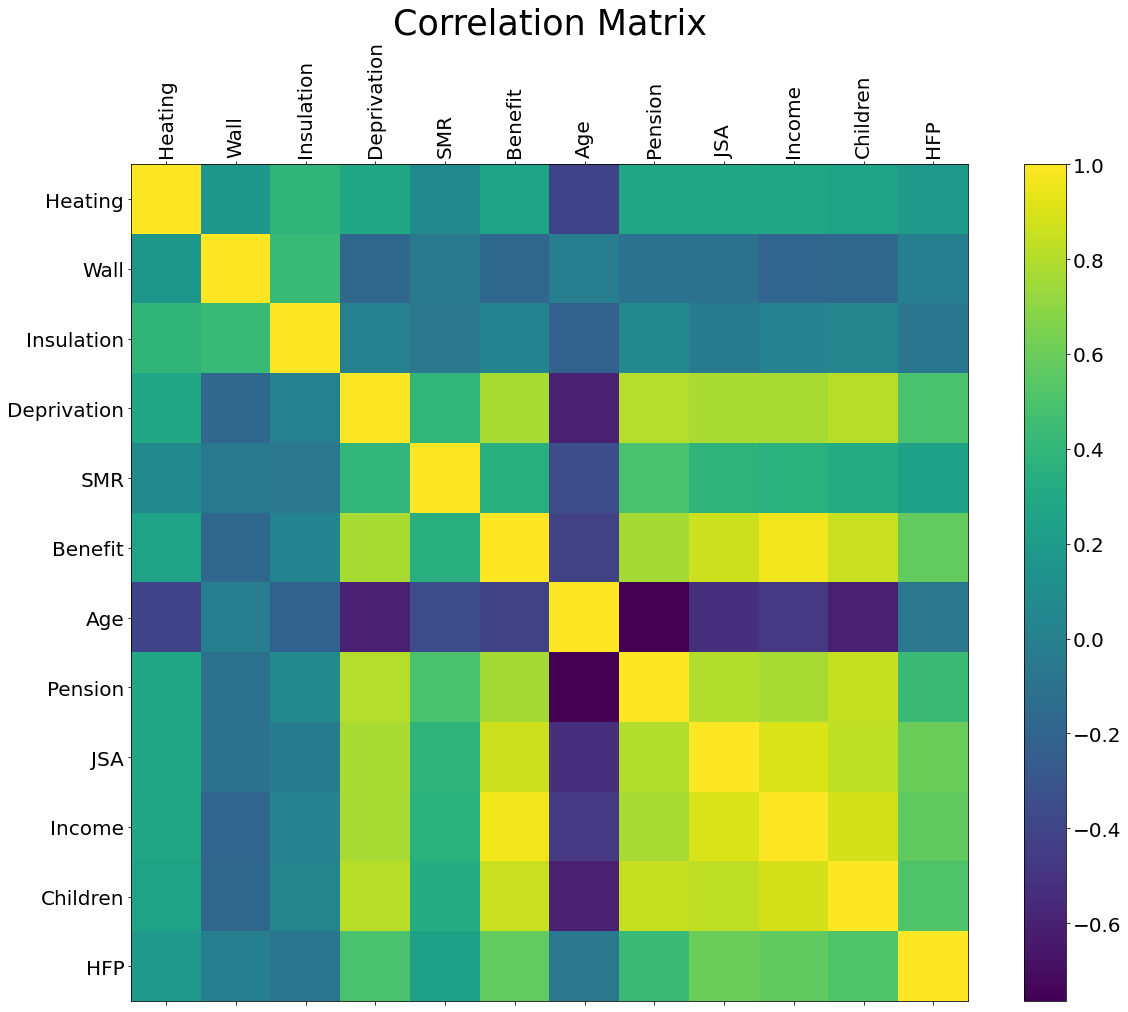

In [16]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(20, 15))
plt.matshow(df_standardised.corr(), fignum=f.number)
plt.xticks(range(df_standardised.shape[1]), df_standardised.columns, fontsize=20, rotation=90)
plt.yticks(range(df_standardised.shape[1]), df_standardised.columns, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=35)

In [17]:
# This performs a multiple regression of expectancy against HFP:

reg_HFP = smf.ols(formula='HFP ~ Heating + Wall + Insulation + Deprivation + SMR + Benefit + Age + Pension + JSA + Income + Children',data=df_pick).fit()

# And this gives a big summary of the results:
print(reg_HFP.summary())

                            OLS Regression Results                            
Dep. Variable:                    HFP   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     61.17
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           4.15e-91
Time:                        07:34:28   Log-Likelihood:                -1260.5
No. Observations:                 625   AIC:                             2545.
Df Residuals:                     613   BIC:                             2598.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9774      2.034      0.972      

In [18]:
# conditional number is large, so calculating VIF to check are there strong multicollinearity
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_standardised, thresh=5):
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_standardised_with_const = add_constant(df_standardised)

        vif_df_standardised = pd.Series([variance_inflation_factor(df_standardised_with_const.values, i) 
               for i in range(df_standardised_with_const.shape[1])], name= "VIF",
              index=df_standardised_with_const.columns).to_frame()

        # drop the const
        vif_df_standardised = vif_df_standardised.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df_standardised.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_standardised.index[vif_df_standardised.VIF == vif_df_standardised.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_standardised = df_standardised.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_standardised

In [19]:
# delete inf and nan
df_pick[np.isnan(df_pick)] = 0
df_pick[np.isinf(df_pick)] = 0

In [20]:
# drop columns that are strong multicollinearity
df_drop = drop_column_using_vif_(df_pick.drop('HFP', axis=1))

Dropping: Income
Dropping: Insulation
Dropping: Benefit
Dropping: Pension
Dropping: Children


In [21]:
# fit a linear regression model
import statsmodels.api as sm

fit_HFP = sm.OLS(endog=df_pick[['HFP']], exog=sm.add_constant(df_drop)).fit()
fit_HFP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HFP   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     560.9
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          8.65e-258
Time:                        07:36:11   Log-Likelihood:                -1361.7
No. Observations:                 679   AIC:                             2737.
Df Residuals:                     672   BIC:                             2769.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1520      0.237      0.642      0.521      -0.313       0.617
Heating         0.1091      0.027      4.070      0.000       0.056       0.162
Wall            0.0481      0.007      7.101      0.000       0.035       0.061
Deprivation     1.0907      0.181      6.034      0.000       0.736       1.446
SMR             0.0094      0.003      3.301      0.001       0.004       0.015
Age             0.2873      0.017     16.828      0.000       0.254       0.321
JSA             0.8895      0.063     14.125      0.000       0.766       1.013
==============================================================================
Omnibus:                       31.597   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.567
Skew:                           0.412   Prob(JB):                     3.46e-10
Kurtosis:                       3.927   Cond. No.                         398.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

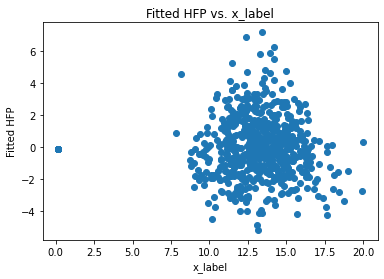

In [22]:
# plot 
plt.scatter(fit_HFP.fittedvalues, fit_HFP.resid)
# adding title and labels
plt.xlabel('x_label')
plt.ylabel('Fitted HFP')
plt.title('Fitted HFP vs. x_label')
plt.show()

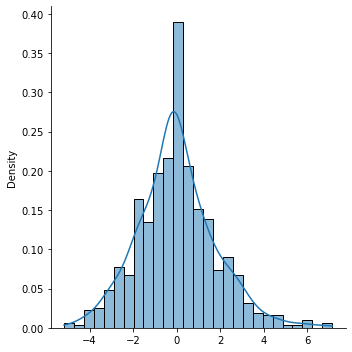

In [25]:
sn.displot(fit_HFP.resid, stat="density", kde = True)